# INRODUCTION
> Breast cancer is a malignant cell growth in the breast. If left untreated, the cancer spreads to other areas of the body. Excluding skin cancer, breast cancer is the most common type of cancer in women in the United States, accounting for one of every three cancer diagnoses. Breast cancer ranks second among cancer deaths in women. 

# GOAL 
> The goal of this notebook is the application of several machine learning techniques to classify whether the tumor mass is benign or malignant in women residing in the state of Wisconsin, USA. This will help in understanding the important underlaying importance of attributes thereby helping in predicting the stage of breast cancer depending on the values of these attributes. 

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
sns.set_style("white")

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report

# Load the dataset

In [3]:
dataset = load_breast_cancer()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# Data Preparation
This stage would include identifying if the data set contains any missing values or bad data.

In [4]:
# check for null values
df.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [5]:
X = df.drop('target', axis='columns')
y = df.target

In [6]:
print(X.shape)
print(y.shape)

(569, 30)
(569,)


In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [8]:
X.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


# EDA
The EDA process will help in understanding the nature of the dataset and help in identification of potential outliers or correlated variables.

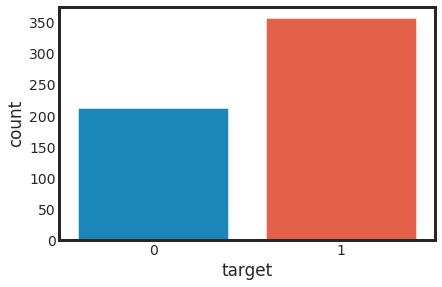

In [9]:
#Check distribution of classes in target
sns.countplot(df['target'],label='count')

In [10]:
y.value_counts()

1    357
0    212
Name: target, dtype: int64

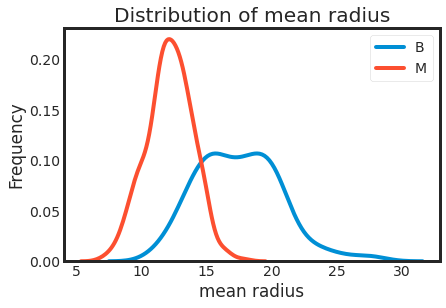

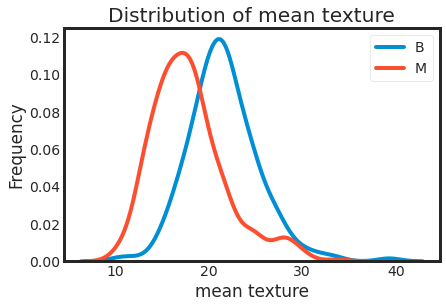

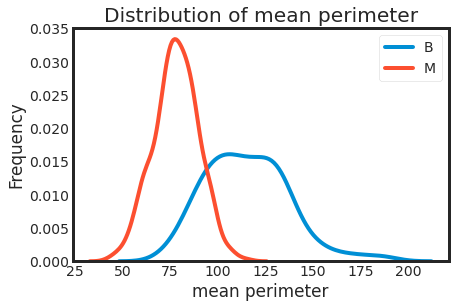

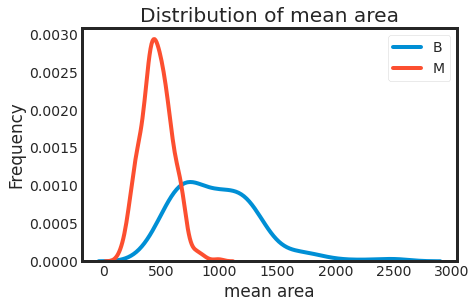

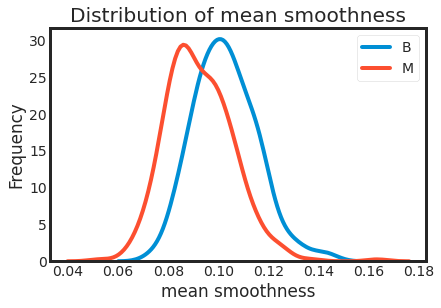

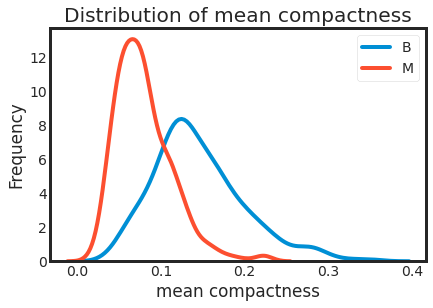

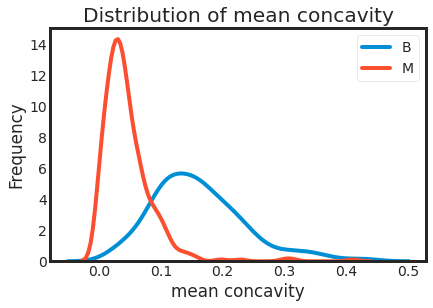

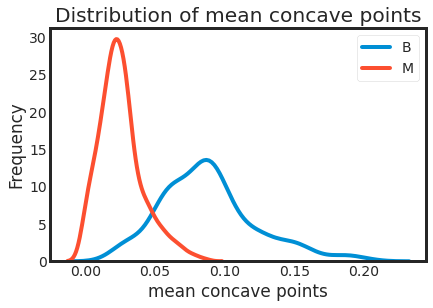

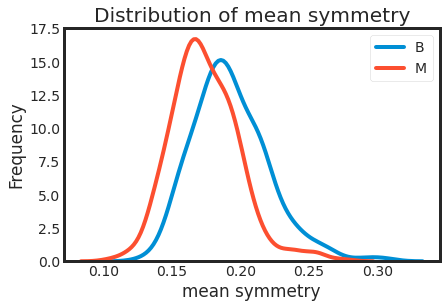

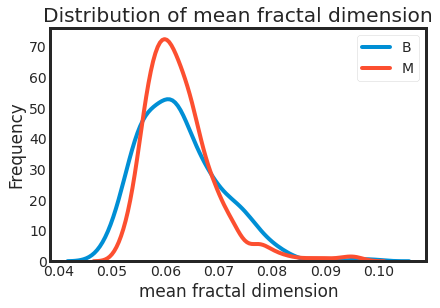

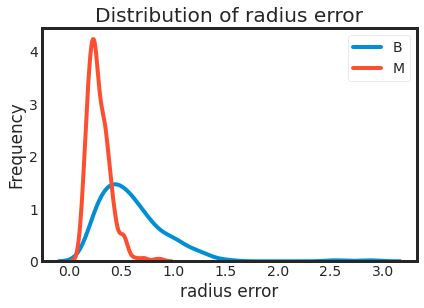

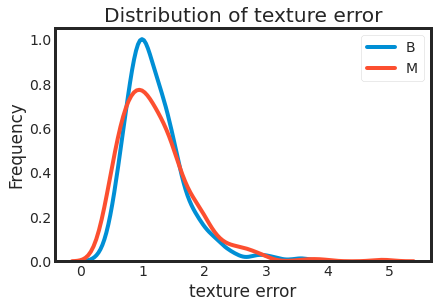

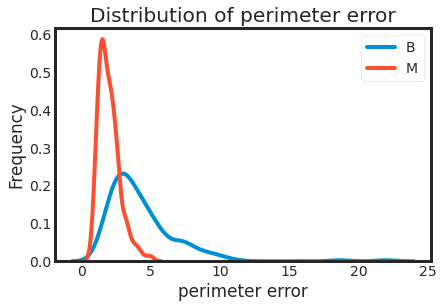

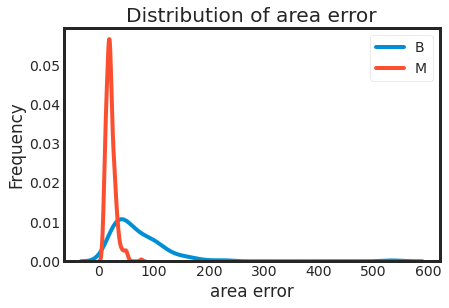

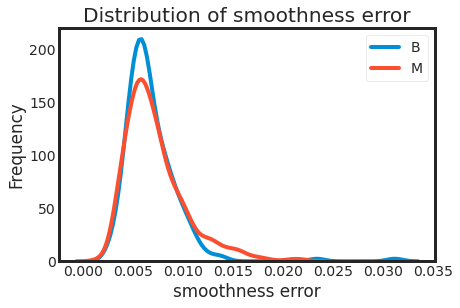

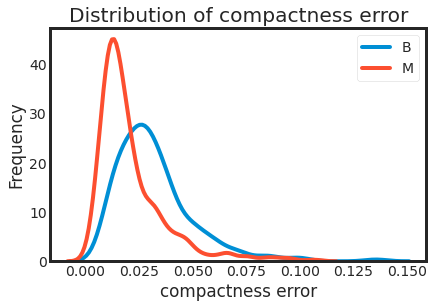

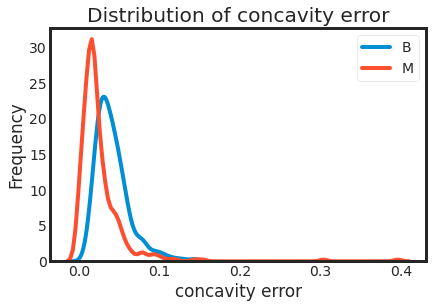

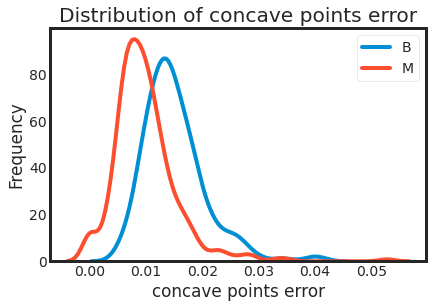

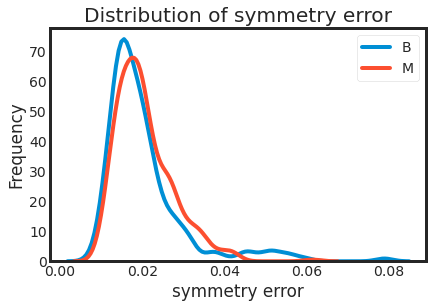

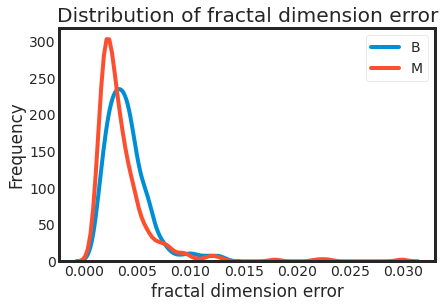

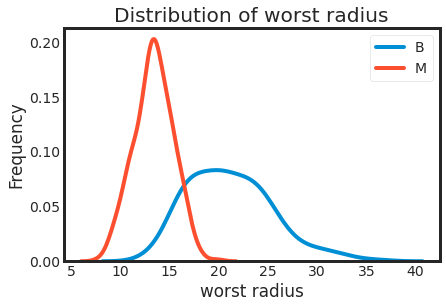

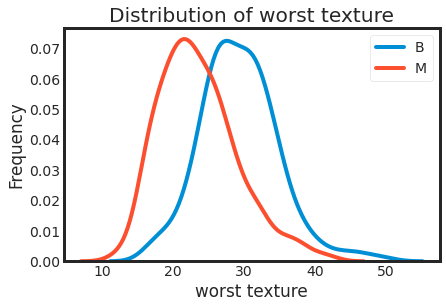

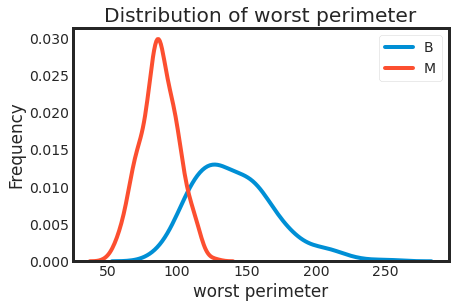

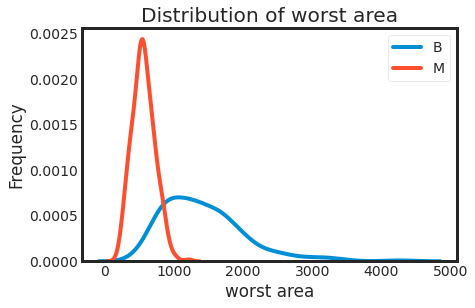

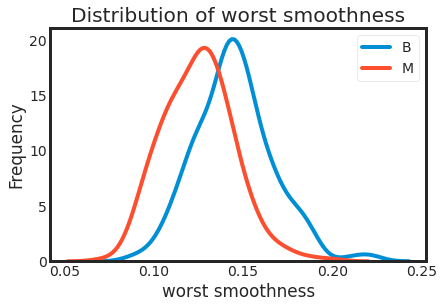

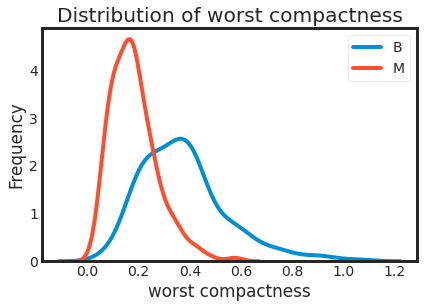

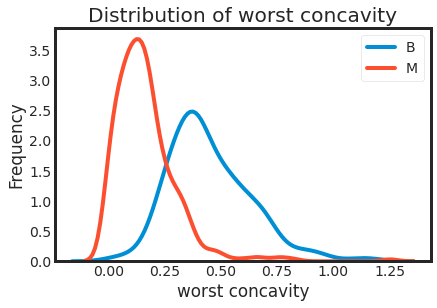

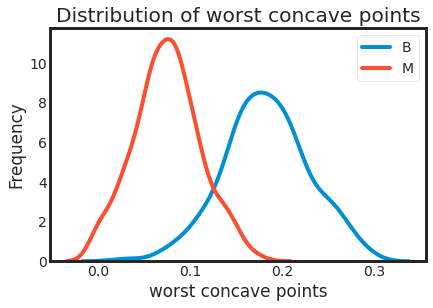

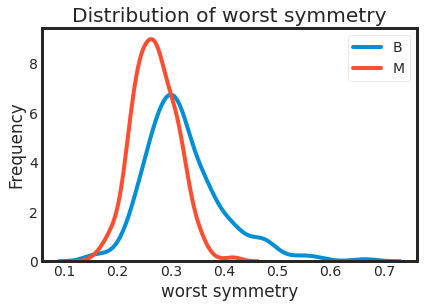

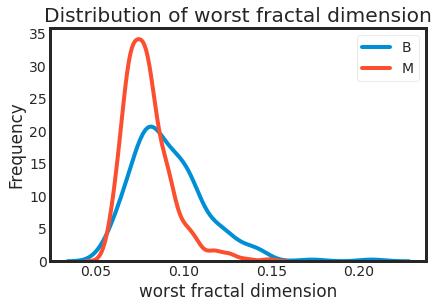

In [11]:
# distribution of every feature 
for column in X:
    plt.figure()
    column_data = X[column]
    sns.kdeplot(column_data[y == 0], label='B')
    sns.kdeplot(column_data[y == 1], label='M')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title('Distribution of {}'.format(column))

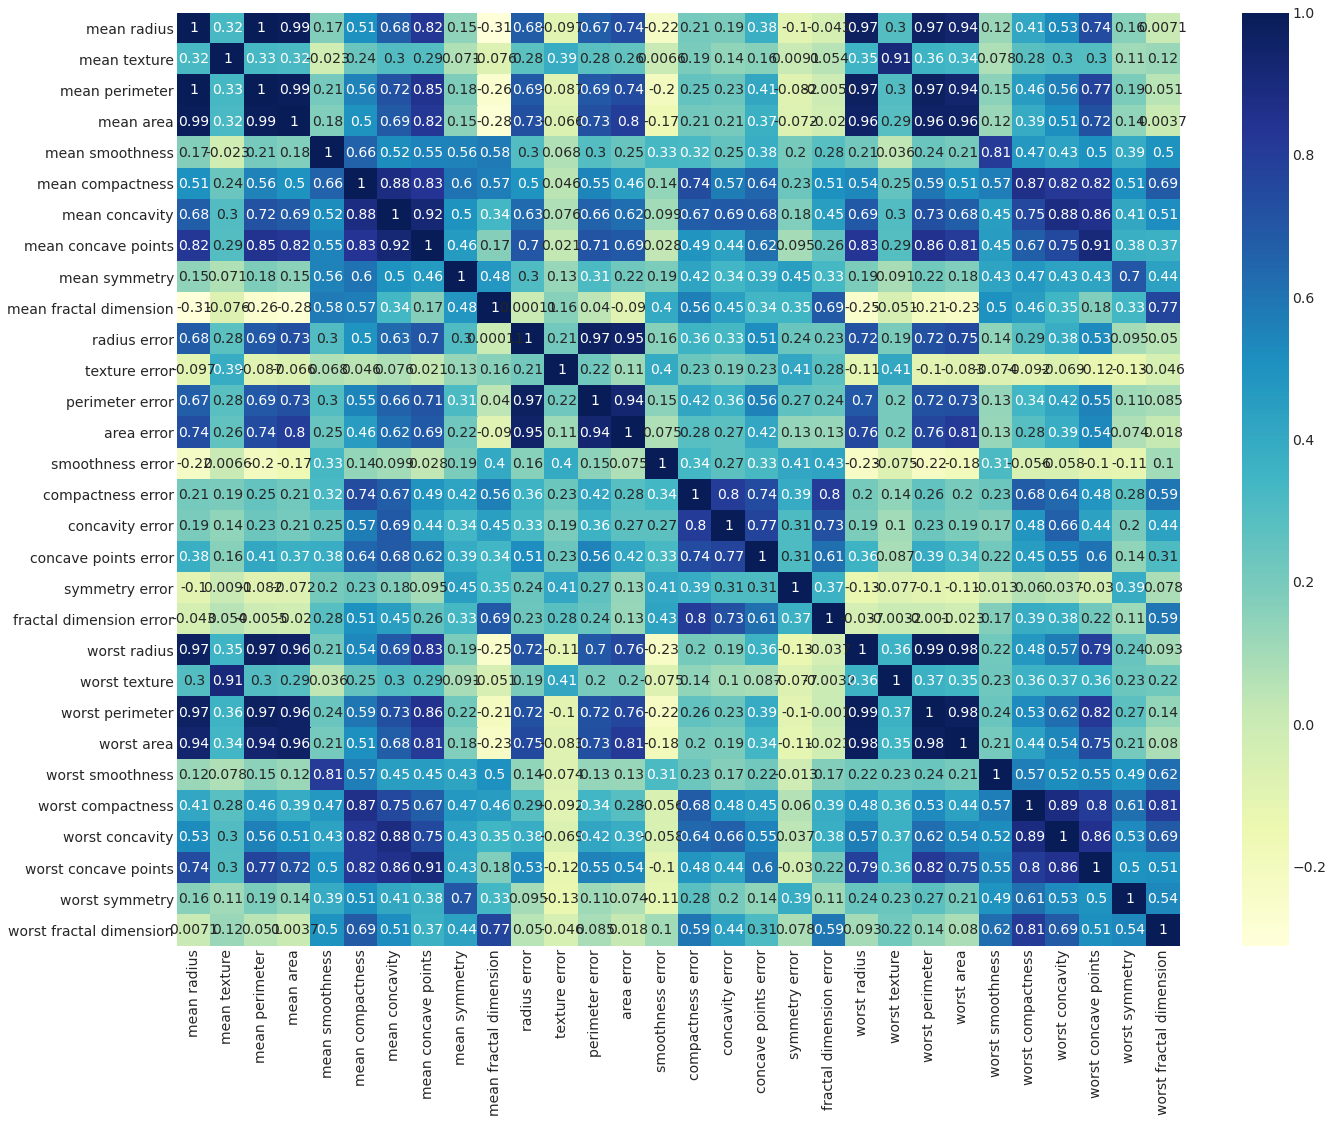

In [12]:
# Calculate and visualise correlations between features
plt.figure(figsize=(20, 16))
sns.heatmap(X.corr(), annot=True, cmap="YlGnBu")

# Create Train and Test Dataset

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, stratify=y)

# Principal Component Analysis (PCA)
> Principal Component Analysis (PCA) is a linear dimensionality reduction technique that can be utilized for extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space. It tries to preserve the essential parts that have more variation of the data and remove the non-essential parts with fewer variation.           
One important thing to note about PCA is that it is an Unsupervised dimensionality reduction technique, you can cluster the similar data points based on the feature correlation between them without any supervision

Text(0.5, 1.0, 'First two principal components of dataset')

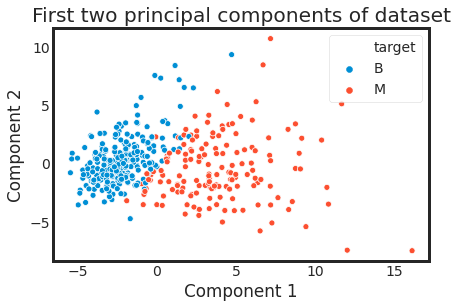

In [14]:
pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=2))
])
X_pca = pipe.fit_transform(X_train, y_train)
sns.scatterplot(X_pca[:,0], X_pca[:,1], hue=y_train.map({0:'M', 1:'B'}))
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('First two principal components of dataset')

# KNN
> knn is essentially classification by finding the most similar data points in the training data, and making an educated guess based on their classifications. K is number of nearest neighbors that the classifier will use to make its prediction. KNN makes predictions based on the outcome of the K neighbors closest to that point. One of the most popular choices to measure this distance is known as Euclidean.

In [15]:
knn_pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('knn', KNeighborsClassifier())
])
param_grid = {
    'pca__n_components': np.arange(1, X_train.shape[1]+1),
    'knn__n_neighbors': np.arange(1, X_train.shape[1], 2)
}
knn_model = GridSearchCV(knn_pipe, param_grid=param_grid, verbose=1, n_jobs=-1)
knn_model.fit(X_train, y_train)

print('Best params: {}'.format(knn_model.best_params_))
print('Training Score: {}'.format(knn_model.score(X_train, y_train)))
print('CV Score: {}'.format(knn_model.best_score_))
print('Test Score: {}'.format(knn_model.score(X_test, y_test)))

Fitting 5 folds for each of 450 candidates, totalling 2250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 1260 tasks      | elapsed:   11.1s


Best params: {'knn__n_neighbors': 11, 'pca__n_components': 9}
Training Score: 0.9788732394366197
CV Score: 0.974281805745554
Test Score: 0.951048951048951


[Parallel(n_jobs=-1)]: Done 2250 out of 2250 | elapsed:   18.5s finished


# Gaussian Naive Bayes
> Gaussian Naive Bayes is a variant of Naive Bayes that follows Gaussian normal distribution and supports continuous data. We have explored the idea behind Gaussian Naive Bayes along with an example.                                        Gaussian Naive Bayes supports continuous valued features and models each as conforming to a Gaussian (normal) distribution.                                                                                                           
An approach to create a simple model is to assume that the data is described by a Gaussian distribution with no co-variance (independent dimensions) between dimensions. This model can be fit by simply finding the mean and standard deviation of the points within each label, which is all what is needed to define such a distribution.



In [16]:
gnb_pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('gnb', GaussianNB())
])
param_grid = {
    'pca__n_components': np.arange(1, X_train.shape[1]+1)
}
gnb_model = GridSearchCV(gnb_pipe, param_grid=param_grid, verbose=1, n_jobs=-1)
gnb_model.fit(X_train, y_train)
print('Best params: {}'.format(gnb_model.best_params_))
print('Training Score: {}'.format(gnb_model.score(X_train, y_train)))
print('CV Score: {}'.format(gnb_model.best_score_))
print('Test Score: {}'.format(gnb_model.score(X_test, y_test)))

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Best params: {'pca__n_components': 7}
Training Score: 0.9295774647887324
CV Score: 0.9251436388508892
Test Score: 0.916083916083916


[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    0.9s finished


# Logistic Regression
> Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression). Mathematically, a binary logistic model has a dependent variable with two possible values, such as pass/fail which is represented by an indicator variable, where the two values are labeled "0" and "1". 

In [17]:
lgr_pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('lgr', LogisticRegression())
])
param_grid = {
    'pca__n_components': np.arange(1, X_train.shape[1]//3),
    'lgr__C': np.logspace(0, 1, 10)
}
lgr_model = GridSearchCV(lgr_pipe, param_grid=param_grid, verbose=1, n_jobs=-1)
lgr_model.fit(X_train, y_train)
print('Best params: {}'.format(lgr_model.best_params_))
print('Training Score: {}'.format(lgr_model.score(X_train, y_train)))
print('CV Score: {}'.format(lgr_model.best_score_))
print('Test Score: {}'.format(lgr_model.score(X_test, y_test)))

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    1.7s


Best params: {'lgr__C': 1.6681005372000588, 'pca__n_components': 8}
Training Score: 0.9882629107981221
CV Score: 0.9859097127222982
Test Score: 0.965034965034965


[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:    3.4s finished


# Random Forest
> Random Forests, also known as random decision forests, are a popular ensemble method that can be used to build predictive models for both classification and regression problems. Ensemble methods use multiple learning models to gain better predictive results - in the case of a random Forest, the model creates an entire forest of random uncorrelated decision trees to arrive at the best possible answer.
The random Forest starts with a standard machine learning technique called a “decision tree” which, in ensemble terms, corresponds to our weak learner. In a decision tree, an input is entered at the top and as it traverses down the tree the data gets bucketed into smaller and smaller sets. The random Forest takes this notion to the next level by combining trees with the notion of an ensemble. Thus, in ensemble terms, the trees are weak learners and the random Forest is a strong learner.

In [18]:
rdf_pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('rdf', RandomForestClassifier())
])
param_grid = {
    'rdf__n_estimators': np.arange(200, 1001, 200),
    'rdf__max_depth': np.arange(1,4),
}
rdf_model = GridSearchCV(rdf_pipe, param_grid=param_grid, verbose=1, n_jobs=-1)
rdf_model.fit(X_train, y_train)
print('Best params: {}'.format(rdf_model.best_params_))
print('Training Score: {}'.format(rdf_model.score(X_train, y_train)))
print('CV Score: {}'.format(rdf_model.best_score_))
print('Test Score: {}'.format(rdf_model.score(X_test, y_test)))

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   41.9s finished


Best params: {'rdf__max_depth': 3, 'rdf__n_estimators': 200}
Training Score: 0.9882629107981221
CV Score: 0.9554582763337894
Test Score: 0.9370629370629371


# Support Vector Classifier
> SVM depends on supervised learning models and trained by learning algorithms. A SVM generates parallel partitions by generating two parallel lines. For each category of data in a high-dimensional space and uses almost all attributes. It separates the space in a single pass to generate flat and linear partitions. Divide the 2 categories by a clear gap that should be as wide as possible. Do this partitioning by a plane called hyperplane.
An SVM creates hyperplanes that have the largest margin in a high-dimensional space to separate given data into classes. The margin between the 2 classes represents the longest distance between closest data points of those classes.

In [19]:
svc_pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('pca', PCA()),
    ('svc', SVC())
])
param_grid = {
    'pca__n_components': np.arange(1, X_train.shape[1]//3),
    'svc__C': np.logspace(0, 3, 10),
    'svc__kernel': ['rbf'],
    'svc__gamma': np.logspace(-4, -3, 10)
}
svc_model = GridSearchCV(svc_pipe, param_grid=param_grid, verbose=1, n_jobs=-1)
svc_model.fit(X_train, y_train)
print('Best params: {}'.format(svc_model.best_params_))
print('Training Score: {}'.format(svc_model.score(X_train, y_train)))
print('CV Score: {}'.format(svc_model.best_score_))
print('Test Score: {}'.format(svc_model.score(X_test, y_test)))

Fitting 5 folds for each of 900 candidates, totalling 4500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 200 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 1400 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 3400 tasks      | elapsed:   21.4s


Best params: {'pca__n_components': 8, 'svc__C': 100.0, 'svc__gamma': 0.001, 'svc__kernel': 'rbf'}
Training Score: 0.9906103286384976
CV Score: 0.9906155950752394
Test Score: 0.972027972027972


[Parallel(n_jobs=-1)]: Done 4500 out of 4500 | elapsed:   28.4s finished


# XGBoost
> XGBoost is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. In prediction problems involving unstructured data (images, text, etc.) artificial neural networks tend to outperform all other algorithms or frameworks. However, when it comes to small-to-medium structured/tabular data, decision tree based algorithms are considered best-in-class right now.                                                                       
XGBoost and Gradient Boosting Machines (GBMs) are both ensemble tree methods that apply the principle of boosting weak learners (CARTs generally) using the gradient descent architecture.

In [20]:
xgb_pipe = Pipeline(steps=[
    ('scaler', StandardScaler()),
#     ('pca', PCA()),
    ('xgb', XGBClassifier())
])
param_grid = {
#     'pca__n_components': np.arange(1, X_train.shape[1]//3),
    'xgb__n_estimators': [100],
    'xgb__learning_rate': np.logspace(-3, 0, 10),
    'xgb__max_depth': np.arange(1, 6),
    'xgb__gamma': np.arange(0, 1.0, 0.1),
    'xgb__reg_lambda': np.logspace(-3, 3, 10)
}
xgb_model = GridSearchCV(xgb_pipe, param_grid=param_grid, verbose=1, n_jobs=-1)
xgb_model.fit(X_train, y_train)
print('Best params: {}'.format(xgb_model.best_params_))
print('Training Score: {}'.format(xgb_model.score(X_train, y_train)))
print('CV Score: {}'.format(xgb_model.best_score_))
print('Test Score: {}'.format(xgb_model.score(X_test, y_test)))

Fitting 5 folds for each of 5000 candidates, totalling 25000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:   34.3s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 2452 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 3552 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 4852 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 6352 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 8052 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 9952 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 12052 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 14352 tasks      | elapsed:  8.8min
[Parallel(n_jobs=-1)]: Done 16852 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 19552 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 22452 tasks  

Best params: {'xgb__gamma': 0.30000000000000004, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 4, 'xgb__n_estimators': 100, 'xgb__reg_lambda': 2.154434690031882}
Training Score: 0.9976525821596244
CV Score: 0.9695212038303694
Test Score: 0.958041958041958


# Stacking
> Stacking (sometimes called Stacked Generalization) is a different paradigm. The point of stacking is to explore a space of different models for the same problem. The idea is that you can attack a learning problem with different types of models which are capable to learn some part of the problem, but not the whole space of the problem. So, you can build multiple different learners and you use them to build an intermediate prediction, one prediction for each learned model.

> The best estimators for each are used to make uncorrelated predictions which in turn are concatenated and fed into a secondary Support Vector Machine estimator by stacking. 

In [21]:

%%time
models = {
    'KNN': knn_model,
    'GaussianNB': gnb_model,
    'LogisticRegression': lgr_model,
    'RandomForests': rdf_model,
    'SVC': svc_model,
    'XGBoost': xgb_model
}
y_stacked = pd.DataFrame({model_name: model.predict(X_train) for model_name, model in models.items()})
y_stacked_train, y_stacked_test, y_train_train, y_train_test = train_test_split(y_stacked, y_train, 
                                                                              random_state=0, stratify=y_train)
param_grid = {
    'C': np.logspace(0, 3, 10),
    'kernel': ['rbf'],
    'gamma': np.logspace(-3, 3, 10)
}
stacked_model = GridSearchCV(SVC(), param_grid=param_grid, verbose=1, n_jobs=-1)
stacked_model.fit(y_stacked_train, y_train_train)
print('Best params: {}'.format(stacked_model.best_params_))
print('Training Score: {}'.format(stacked_model.score(y_stacked_train, y_train_train)))
print('CV Score: {}'.format(stacked_model.best_score_))
print('Test Score: {}'.format(stacked_model.score(y_stacked_test, y_train_test)))

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    1.1s


Best params: {'C': 1.0, 'gamma': 0.1, 'kernel': 'rbf'}
Training Score: 1.0
CV Score: 1.0
Test Score: 0.9813084112149533
CPU times: user 1.52 s, sys: 50.4 ms, total: 1.57 s
Wall time: 1.81 s


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.7s finished


# Evaluation

In [22]:
y_stacked = pd.DataFrame({model_name: model.predict(X_test) for model_name, model in models.items()})
y_pred = stacked_model.predict(y_stacked)
print('Overall Accuracy Score: {:.2%}'.format(accuracy_score(y_test, y_pred)))
print('Classification report:')
print(classification_report(y_test, y_pred))

Overall Accuracy Score: 96.50%
Classification report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        53
           1       0.97      0.98      0.97        90

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.97      0.96       143

